<a href="https://colab.research.google.com/github/nazmulcse041/Machine-Learning/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as splt
import seaborn 
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [ ]:
#import the dataset
path='/content/cardio_train.csv'

In [ ]:
df=pd.read_csv(path,sep=';')

In [ ]:
df


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
#dataset shape
df.shape

(70000, 13)

In [ ]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


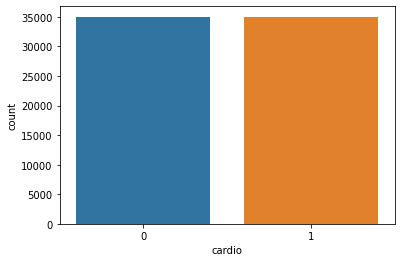

In [ ]:
# data visualization for cardio 
seaborn.countplot(df['cardio'])

In [ ]:
#checking the null value
df.isnull().values.any()

False

# **`1 - women, 2 - men`**

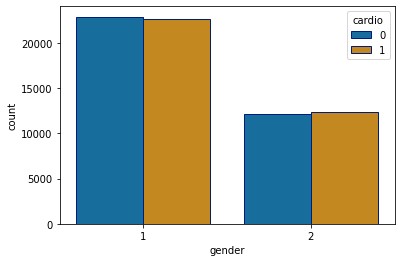

In [ ]:
seaborn.countplot(x='gender',hue='cardio',data=df,palette='colorblind',edgecolor=seaborn.color_palette('dark',n_colors=1))

In [ ]:
#converting the age from from day to year by dividing 365 and then round the age
df['yr']=(df['age']/365).round(0)

In [ ]:
df['yr']

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: yr, Length: 70000, dtype: float64

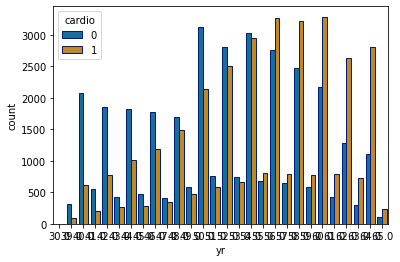

In [ ]:
seaborn.countplot(x='yr',hue='cardio',data=df,palette='colorblind',edgecolor=seaborn.color_palette('dark',n_colors=1))

In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,yr
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


In [ ]:
#checking the correlation
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,yr
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003050
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884


In [ ]:
df=df.drop(['id'],axis=1)

In [ ]:
#spliting the column
x=df.iloc[:,:-1]

In [ ]:
x = df.drop('cardio', axis = 1)

In [ ]:
y=df['cardio']

In [ ]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

# **Spliting the dataset**

In [ ]:
xtrain ,xtest, ytrain, ytest = train_test_split(x,y,test_size =0.3,random_state=1)

In [ ]:
xtrain

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,yr
23561,16136,2,169,71.0,100,80,1,1,1,0,1,44.0
34858,14615,1,158,69.0,140,80,2,1,0,0,1,40.0
54953,20507,1,164,65.0,120,80,1,1,0,0,1,56.0
59230,16720,1,153,53.0,100,60,1,1,0,0,1,46.0
1730,21050,1,159,71.0,140,90,1,1,0,0,1,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49100,21289,2,175,78.0,120,80,1,1,0,0,1,58.0
20609,19116,1,164,68.0,120,80,1,1,0,0,0,52.0
21440,18049,2,178,82.0,120,80,1,1,0,0,1,49.0
50057,21957,1,169,77.0,120,80,1,1,0,0,0,60.0


### **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
Rclf=RandomForestClassifier()

In [ ]:
#training the model
Rclf.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
Rclf.score(xtest,ytest)

0.7177142857142857

### **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
Clf=DecisionTreeClassifier()

In [ ]:
Clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
#Accuracy on test data
Clf.score(xtest,ytest)

0.634

### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#Accuracy on test data
model.score(xtest,ytest)

0.7091428571428572

### **Ada Boost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
Aclf=AdaBoostClassifier()

In [ ]:
Aclf.fit(xtrain,ytrain)

AdaBoostClassifier()

In [ ]:
#Accuracy on test data
Aclf.score(xtest,ytest)

0.7293333333333333

### **XgBoost Classifier**

In [ ]:
from xgboost import XGBClassifier
xgbm = XGBClassifier()

In [ ]:
xgbm.fit(xtrain, ytrain)

XGBClassifier()

In [ ]:
xgbm.score(xtest, ytest)

0.7343809523809524

## **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
classifier = GaussianNB()
classifier.fit(xtrain, ytrain)
y_pred = classifier.predict(xtest)

In [ ]:
print('Accuracy Score:')
print(metrics.accuracy_score(ytest,y_pred))

Accuracy Score:
0.5910952380952381
